# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [83]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=False,
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=False,
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [7]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(num_examples):
        print('-' * 80)
        print('Example: %d' % (i + 1))
        print('Newsgroup: label %d, %s' % (train_labels[i], newsgroups_train.target_names[train_labels[i]]))
        print('Message:\n%s' % (train_data[i]))
### STUDENT END ###

# also passed in the function globally: 
# train_data, train_labels, newsgroups_train.target_names
P1(5)

--------------------------------------------------------------------------------
Example: 1
Newsgroup: label 0, alt.atheism
Message:


I think that domestication will change behavior to a large degree.
Domesticated animals exhibit behaviors not found in the wild.  I
don't think that they can be viewed as good representatives of the
wild animal kingdom, since they have been bred for thousands of years
to produce certain behaviors, etc.
--------------------------------------------------------------------------------
Example: 2
Newsgroup: label 2, sci.space
Message:


I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
read

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [8]:
def P2():
### STUDENT START ###

    print('ANSWER:\n')

    # create the vectorizer that transforms text into term-document matrix 
    # with row = # of messages (or examples), column = # of vocabularies, value = # of occurences
    vect = CountVectorizer()
    # fit: learn the vocabulary dictionary (aka raw training text)
    # transform: return term-document matrix (aka feature vectors)
    train_features = vect.fit_transform(train_data)

    print('2.a.')
    # train_features.shape = (# of messages, # of vocabs)
    num_vocabs = train_features.shape[1]
    #num_vocabs = len(vect.vocabulary_.values())
    num_messages = train_features.shape[0]
    # number of nonzero elements in term-document matrix (aka feature vectors)
    num_nonzero_features = train_features.nnz
    print('What is the size of the vocabulary? %d' % 
          num_vocabs)
    print('What is the average number of non-zero features per example? %.4f' % 
          round(num_nonzero_features/num_messages, 4))
    print('What fraction of the entires in the matrix are non-zero? %.4f' % 
          round(num_nonzero_features/(num_messages * num_vocabs), 4))

    print('\n2.b.')
    train_feature_names = vect.get_feature_names()
    print('What are the 0th feature string (in alphabetical order)? %s' % 
         vect.get_feature_names()[0])
    print('What are the last feature string (in alphabetical order)? %s' %
         vect.get_feature_names()[-1])
    
    print('\n2.c.')
    # ignore words that do not appear in the provided list of words (aka myvocab)
    myvocab = ['atheism', 'graphics', 'space', 'religion']
    vect = CountVectorizer(vocabulary = myvocab)
    train_features = vect.fit_transform(train_data)
    print('Specify your own vocabulary with 4 words: {}'.format(myvocab))
    print('Confirm the training vectors are appropraitely shaped. I expect it to be ({}, {}): {}'.format(
        num_messages, len(myvocab), train_features.shape))
    print('What is the average number of non-zero features per example? %.4f' % 
          round(train_features.nnz/train_features.shape[0], 4))
    
    print('\n2.d.')
    vect = CountVectorizer(analyzer='char', ngram_range=(2, 3))
    train_features = vect.fit_transform(train_data)
    print('What size vocabulary does this (extracting bigram and trigram character features) yield? %d' %
         train_features.shape[1])
    
    print('\n2.e.')
    # minimum document frequency
    min_df = 10
    vect = CountVectorizer(min_df = min_df)
    train_features = vect.fit_transform(train_data)
    print('What size vocabulary does this (pruning words that appear in fewer than 10 documents) yield? %d' %
         train_features.shape[1])
    
    print('\n2.f.')
    vect = CountVectorizer()
    dev_features = vect.fit_transform(dev_data)
    dev_feature_names = vect.get_feature_names()
    print('What fraction of the words in the dev data are missing from the vocabulary?\n' + 
          'a. Out of dev data: {:.4f}\nb. Out of train data: {:.4f}'.format(
        len(set(dev_feature_names) - set(train_feature_names)) / len(dev_feature_names),
        len(set(dev_feature_names) - set(train_feature_names)) / len(train_feature_names)))

### STUDENT END ###

# also passed in the function globally: 
# train_data, dev_data
P2()

ANSWER:

2.a.
What is the size of the vocabulary? 26879
What is the average number of non-zero features per example? 96.7060
What fraction of the entires in the matrix are non-zero? 0.0036

2.b.
What are the 0th feature string (in alphabetical order)? 00
What are the last feature string (in alphabetical order)? zyxel

2.c.
Specify your own vocabulary with 4 words: ['atheism', 'graphics', 'space', 'religion']
Confirm the training vectors are appropraitely shaped. I expect it to be (2034, 4): (2034, 4)
What is the average number of non-zero features per example? 0.2684

2.d.
What size vocabulary does this (extracting bigram and trigram character features) yield? 35478

2.e.
What size vocabulary does this (pruning words that appear in fewer than 10 documents) yield? 3064

2.f.
What fraction of the words in the dev data are missing from the vocabulary?
a. Out of dev data: 0.2489
b. Out of train data: 0.1352


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [13]:
def P3():
### STUDENT START ###
    
    # define changing values
    # 1. for knn, generate a list of odd k's ranging from 1 to 50
    n_neighbors = list(range(1, 50, 2))
    # 2. for multinomial naive bayes, a list of alpha's ranging from 0 to 0.1
    alphas = np.arange(0.1, 1, 0.1)
    # 3. for logistic regression, a list of C's ranging from 0.1 to 1 (C > 0)
    Cs = np.arange(0.1, 1, 0.1)

    # create the vectorizer that transforms text into term-document matrix (aka features)
    # with row = # of messages (or examples), column = # of vocabularies, value = # of occurences
    vect = CountVectorizer()
    train_features = vect.fit_transform(train_data)
    dev_features = vect.transform(dev_data)
        
    # --------------------------------------------------------------------------------
    # k nearest neighbors: find the optimal value for k
    # --------------------------------------------------------------------------------

    knn_model = KNeighborsClassifier()
    # perform cross validation to find the best params for the model
    knn_cv = GridSearchCV(knn_model, {'n_neighbors': n_neighbors}, scoring='f1_weighted')
    knn_cv.fit(train_features, train_labels)
    print('-' * 80)
    print('Model type: {}'.format(type(knn_model)))
    print('k: {}'.format(n_neighbors))
    print('optimal k: {}'.format(knn_cv.best_params_['n_neighbors']))
    print('F1-score for optimal k: {:.4f}'.format(
        metrics.f1_score(dev_labels, knn_cv.predict(dev_features), average='weighted')))
    # note: knn_cv.best_estimator_.predict == knn_cv.predict
    
    # --------------------------------------------------------------------------------
    # multinomial naive bayes: find the optimal value for alpha
    # --------------------------------------------------------------------------------

    mnb_model = MultinomialNB()
    # perform cross validation to find the best params for the model
    mnb_cv = GridSearchCV(mnb_model, {'alpha': alphas}, scoring='f1_weighted')
    mnb_cv.fit(train_features, train_labels)
    print('-' * 80)
    print('Model type: {}'.format(type(mnb_model)))
    print('alpha: {}'.format(alphas))
    print('optimal alpha: {}'.format(mnb_cv.best_params_['alpha']))
    print('F1-score for optimal alpha: {:.4f}'.format(
        metrics.f1_score(dev_labels, mnb_cv.predict(dev_features), average='weighted')))
    
    # --------------------------------------------------------------------------------
    # logistic regression: find the optimal value for the regularization strength C using l2 regularization
    # --------------------------------------------------------------------------------

    lr_model = LogisticRegression()
    # perform cross validation to find the best params for the model
    lr_cv = GridSearchCV(lr_model, {'penalty': ['l2'], 'C': Cs}, scoring='f1_weighted')
    lr_cv.fit(train_features, train_labels)
    print('-' * 80)
    print('Model type: {}'.format(type(lr_model)))
    print('C: {}'.format(Cs))
    print('optimal C: {}'.format(lr_cv.best_params_['C']))
    print('F1-score for optimal C: {:.4f}'.format(
        metrics.f1_score(dev_labels, lr_cv.predict(dev_features), average='weighted')))
    
    print('sum of the squared weight values for each class for each setting of the C parameter:')
    for C in Cs:
        model = LogisticRegression(C=C) # defaults to penalty = 'l2'
        model.fit(train_features, train_labels)
        print('C: {}, sum of squared weight values: {}'.format(
            round(C, 2), str(np.sum(np.square(model.coef_), axis=1))))

    # --------------------------------------------------------------------------------

### STUDENT END ###
P3()

--------------------------------------------------------------------------------
Model type: <class 'sklearn.neighbors.classification.KNeighborsClassifier'>
k: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
optimal k: 17
F1-score for optimal k: 0.4180
--------------------------------------------------------------------------------
Model type: <class 'sklearn.naive_bayes.MultinomialNB'>
alpha: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
optimal alpha: 0.1
F1-score for optimal alpha: 0.7712
--------------------------------------------------------------------------------
Model type: <class 'sklearn.linear_model.logistic.LogisticRegression'>
C: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
optimal C: 0.4
F1-score for optimal C: 0.7230
sum of the squared weight values for each class for each setting of the C parameter:
C: 0.1, sum of squared weight values: [27.13199955 24.65957471 27.4587074  23.02184411]
C: 0.2, sum of squared weight values: [49.72936301 

ANSWER: 

3a. Why doesn't nearest neighbors work well for this problem?

Nearest neighbor does not work well for this problem because of the curse of dimensionality. It is difficult for nearest neighbor to classify multiple features (approximately 26879 features). 

3b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

Logistic regression does not work as well as Naive Bayes because:

* The assumption for logistic regression is not met while the assumption for Naive Bayes is. Logistic regression assumes that all observations are independent when this is not the case. One message might be correlated with another message because they are posted within the same newsgroup. On the other hand, Naive Bayes assumes that all features are conditionally independent. This assumption is mostly met because the probability of a word appearing in one newsgroup is most likely not related to the probability of the same word appearing in another newsgroup. The only exception to this might be newsgroups which are similarly related to each other like "atheism" and "religion."
* The training dataset is small, which can lead logistic regression to overfitting. On the other hand, Naive Bayes will not have this issue because it estimates based on the joint density function. 

3c. For logistic regression, briefly explain the relationship between the sum and the value of C.

As can be seen from the outputs, larger C corresponds to larger values of sum of squared weights. C is the inverse of regularization strength, which means larger values of C correspond to weaker regularization. Smaller values of C corresponds to stronger regularization. We add regularization term to the cost function in order to shrink the parameters so that we do not overfit the model onto the data. We do not want to penalize and shrink the parameters too much that we underfit the data. In summary, smaller C corresponds to stronger regularization which in turn leads to smaller values of the sum of squared weights that shrink the parameters to prevent the model from overfitting the data. 

https://www.youtube.com/watch?v=KvtGD37Rm5I

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [166]:
def P4(C=0.4): 
### STUDENT START ###

    # define changing variables
    top_n = 5
    ngram_range = (1, 2)

    for ngram in ngram_range:
        # create the vectorizer that transforms text into term-document matrix (aka features)
        # with row = # of messages (or examples), column = # of vocabularies, value = # of occurences
        vect = CountVectorizer(ngram_range=(ngram, ngram))
        train_features = vect.fit_transform(train_data)
        dev_features = vect.transform(dev_data)

        # train a logistic regression model with the optimal param found in P3
        lr_model = LogisticRegression(C=C)
        lr_model.fit(train_features, train_labels)

        # find 5 features with largest weights for each label -- 20 features in total
        # 1. for each newsgroup, find the index of top 5 features with the largest weights in descending order
        top_weight_indexes = np.array([np.argpartition(-row, range(top_n))[:top_n] for row in lr_model.coef_])
        # 2. reshape 4x5 array into 1x20 array
        # lr_model.coef_[0]: len(newsgroups_train.target_names)
        # lr_model.coef_[1]: top_n
        reshape_col = len(newsgroups_train.target_names) * top_n
        reshape_top_weight_indexes = top_weight_indexes.reshape(1, reshape_col).tolist()[0]
        # 3. rename indexes into its respective vocabulary terms
        vocab = [vect.get_feature_names()[index] for index in reshape_top_weight_indexes]
        index = np.repeat(range(1, len(newsgroups_train.target_names)+1), top_n)
                
        # create a table with 20 rows and 4 columns 
        # that shows the weight for each of these features for each of the labels
        print('-' * 80)
        print('{:>40}-gram'.format(ngram))
        print('-' * 80)
        print(pd.DataFrame({
             'vocab': vocab,
             newsgroups_train.target_names[0]: [lr_model.coef_[0][index] for index in reshape_top_weight_indexes],
             newsgroups_train.target_names[1]: [lr_model.coef_[1][index] for index in reshape_top_weight_indexes],
             newsgroups_train.target_names[2]: [lr_model.coef_[2][index] for index in reshape_top_weight_indexes],
             newsgroups_train.target_names[3]: [lr_model.coef_[3][index] for index in reshape_top_weight_indexes]
            },
            columns=['vocab'] + newsgroups_train.target_names,
            index=index))
### STUDENT END ###
# also passed in the function globally: 
# train_data, dev_data
P4()

#  26879: 1-gram
# 221770: 2-gram

--------------------------------------------------------------------------------
                                       1-gram
--------------------------------------------------------------------------------
        vocab  alt.atheism  comp.graphics  sci.space  talk.religion.misc
1    atheists     0.774253      -0.092135  -0.250866           -0.579621
1       bobby     0.772306      -0.181621  -0.269023           -0.363592
1    religion     0.751261      -0.475539  -0.618348           -0.043954
1     atheism     0.748960      -0.330803  -0.341601           -0.360325
1       islam     0.637761      -0.101141  -0.266972           -0.270773
2    graphics    -0.605578       1.531430  -1.032555           -0.586016
2       image    -0.435731       1.045629  -0.624949           -0.354875
2        file    -0.258699       0.996074  -0.644018           -0.471149
2          3d    -0.285813       0.884192  -0.531064           -0.297957
2    computer     0.050117       0.803401  -0.533933          

ANSWER:

Any surprising features in the table?
1. The top weighted words in 1-gram are relatable to their respective newsgroup.
2. It is interesting to note that alt.atheism and talk.religion.misc newsgroup share common words, including a surprising police term. For example, "bobby" is a slang term for a member of London’s Metropolitan Police while "fbi" is the domestic intelligence and security service of the United States. 
3. If "bobby" does not refer to a police term, then it could refer to active users who sign their names after each message. If that was the case, it is interesting to note that both 1-gram and 2-gram include active users as the top 5 features with largest weights. For example, "cheers kent" appears highly in both alt.atheism and talk.religion.misc newsgroup.
4. 1-gram selects words that are more closely related to the newsgroup compared to that of 2-gram. Partially, in 2-gram, we did not remove any stop words.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [77]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    # 1. standardize case with lowercase
    s = s.lower()
    # 2. strip leading and trailing whitespaces
    s = s.strip()
    # 3. replace sequences of numbers with a single token (I use 0)
    # 3.a. find and replace arithmetic sequence
    # TODO
    # 3.b. find and replace geometric sequence
    # TODO
    # 3.c. find and replace repeating sequence of a number, i.e. 5151
    #s = re.sub('(.+.+)(\1)+', '*', s)
    # NOTE: adding 3.c. does not improve the f1-score
    # 3.d. find and replace sequence of numbers 
    #s = re.sub('\d+', '0', s)
    # NOTE: adding 3.d. degrades the f1-score
    # 4. remove various other non-letter characters
    s = re.sub('[^ a-zA-Z0-9]', '', s) # alpha-numeric
    # NOTE: alpha-numeric improves the f1-score more than letters only
    # separate s into individual words for stemming and stop words
    words = s.split()
    # 5. shorten words to their stem
    stemmer = SnowballStemmer('english')
    words = stemmed_words = [stemmer.stem(word) for word in words]
    # 6. remove stop words
    words = non_stop_words = [word for word in words if not word in set(stopwords.words("english"))]
    # combine individual words back to s
    s = ' '.join(words)
    return s
    
### STUDENT END ###

def P5(C=0.4): 
### STUDENT START ###

    def get_dict_size_and_f1_score(preprocessor_type):
        # create the vectorizer that transforms text into term-document matrix (aka features)
        # with row = # of messages (or examples), column = # of vocabularies, value = # of occurences
        vect = CountVectorizer(preprocessor=preprocessor_type)
        train_features = vect.fit_transform(train_data)
        dev_features = vect.transform(dev_data)
        
        # train a logistic regression model with the optimal param found in P3
        lr_model = LogisticRegression(C=C)
        lr_model.fit(train_features, train_labels)

        # obtain f1-score
        f1_score = metrics.f1_score(dev_labels, lr_model.predict(dev_features), average='weighted')
                
        return train_features.shape[1], f1_score
    
    ep_feature_size, ep_f1_score = get_dict_size_and_f1_score(empty_preprocessor)
    bp_feature_size, bp_f1_score = get_dict_size_and_f1_score(better_preprocessor)

    print('-' * 80)
    print('Feature/Vocabulary/Dictionary size')
    print('-' * 80)
    print('Empty preprocessor\'s vocabulary size: %d' % ep_feature_size)
    print('Better preprocessor\'s vocabulary size: %d' % bp_feature_size)
    print('Vocabulary has been reduced by: {:.4f}%'.format((ep_feature_size - bp_feature_size)/ep_feature_size * 100))
    #print('Vocabulary has been reduced by: {:.4f}'.format((1 - bp_feature_size/ep_feature_size) * 100))
    
    print('-' * 80)
    print('F1-score')
    print('-' * 80)  
    print('Empty preprocessor\'s f1-score: {:.4f}'.format(ep_f1_score))
    print('Better preprocessor\'s f1-score: {:.4f}'.format(bp_f1_score))
    print('F1-score improves by: {:.4f}'.format(bp_f1_score - ep_f1_score))
        
### STUDENT END ###
P5()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tiffapedia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--------------------------------------------------------------------------------
Feature/Vocabulary/Dictionary size
--------------------------------------------------------------------------------
Empty preprocessor's vocabulary size: 33291
Better preprocessor's vocabulary size: 40643
Vocabulary has been reduced by: -22.0840%
--------------------------------------------------------------------------------
F1-score
--------------------------------------------------------------------------------
Empty preprocessor's f1-score: 0.7050
Better preprocessor's f1-score: 0.7108
F1-score improves by: 0.0058


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]


Reference: 
* L1 and L2 norm: https://www.youtube.com/watch?v=5fN2J8wYnfw&list=PLvcbYUQ5t0UFhdkiCojiFOygmbMU19BFq 
* Regularization: bias the parameter towards a particular value by adding a penalty term that encourages that value

C=0.40
--------------------------------------------------------------------------------
penalty L1
--------------------------------------------------------------------------------
(n_classes, n_features): (4, 26879)
Number of nonzero weights: 1065
Sparsity: 99.01%
Score: 0.9012
--------------------------------------------------------------------------------
penalty L2
--------------------------------------------------------------------------------
(n_classes, n_features): (4, 26879)
Number of nonzero weights: 107516
Sparsity: 0.00%
Score: 0.9769
--------------------------------------------------------------------------------
penalty L2 with reduced vocabulary
--------------------------------------------------------------------------------
(n_classes, n_features): (4, 632)
Number of nonzero weights: 2528
Sparsity: 0.00%
Score: 0.9346
--------------------------------------------------------------------------------
plot accuracy of re-trained model vs vocab size
--------------------------

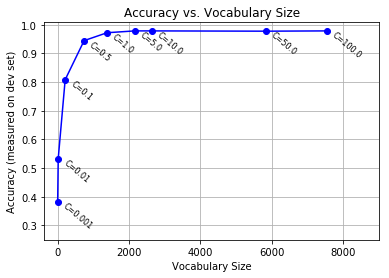

In [78]:
def P6(C=0.4):
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    # create the vectorizer that transforms text into term-document matrix (aka features)
    # with row = # of messages (or examples), column = # of vocabularies, value = # of occurences
    vect = CountVectorizer()
    train_features = vect.fit_transform(train_data)
    dev_features = vect.transform(dev_data)
    
    # define: 
    # 1. C based on optimized parameter found in P3
    # 2. relax convergence criteria for extreme values of C by setting tol = 0.01 (vs 0.001)
    tol = 0.01
    
    # --------------------------------------------------------------------------------
    # logistic regression with penalty l1
    # --------------------------------------------------------------------------------
    
    l1_lr = LogisticRegression(C=C, penalty='l1', tol=tol)
    l1_lr.fit(train_features, train_labels)
    sparsity_l1_lr = np.mean(l1_lr.coef_.ravel() == 0) * 100
                
    # --------------------------------------------------------------------------------
    # logistic regression with penalty l2
    # --------------------------------------------------------------------------------

    l2_lr = LogisticRegression(C=C, penalty='l2', tol=tol)
    l2_lr.fit(train_features, train_labels)
    sparsity_l2_lr = np.mean(l2_lr.coef_.ravel() == 0) * 100
    
    # --------------------------------------------------------------------------------
    # logistic regression with penalty l2 and reduced vocabulary 
    # --------------------------------------------------------------------------------

    # reduced vocabulary: keep features that have at least one non-zero weight
    nonzero_indexes = np.nonzero(np.any(l1_lr.coef_ != 0, axis=0))[0]
    #nonzero_indexes = np.unique(np.nonzero(l1_lr.coef_)[1]) # 2nd method
    nonzero_features = np.array(vect.get_feature_names())[nonzero_indexes]
    
    # create the vectorizer with the reduced vocabulary
    rv_vect = CountVectorizer(vocabulary=nonzero_features)    
    rv_train_features = rv_vect.fit_transform(train_data)
    rv_data_features = rv_vect.transform(dev_data)
    
    l2_rv_lr = LogisticRegression(C=C, penalty='l2', tol=tol)
    l2_rv_lr.fit(rv_train_features, train_labels)
    sparsity_l2_rv_lr = np.mean(l2_rv_lr.coef_.ravel() == 0) * 100
    
    # --------------------------------------------------------------------------------
    # compare the three models
    # --------------------------------------------------------------------------------
    
    print('C=%.2f' % C)
    
    def print_output(penalty, coef_shape, num_nonzero_weights, sparsity, score):
        print('-' * 80)
        print('penalty %s' % penalty)
        print('-' * 80)
        print('(n_classes, n_features): {}'.format(coef_shape))
        print('Number of nonzero weights: %d' % num_nonzero_weights)
        print('Sparsity: %.2f%%' % sparsity)
        print('Score: %.4f' % score) # score == mean accuracy
    
    print_output('L1', l1_lr.coef_.shape, np.count_nonzero(l1_lr.coef_), sparsity_l1_lr, l1_lr.score(train_features, train_labels))
    print_output('L2', l2_lr.coef_.shape, np.count_nonzero(l2_lr.coef_), sparsity_l2_lr, l2_lr.score(train_features, train_labels))
    print_output('L2 with reduced vocabulary', l2_rv_lr.coef_.shape, np.count_nonzero(l2_rv_lr.coef_), sparsity_l2_rv_lr, l2_rv_lr.score(rv_train_features, train_labels))
    
    # --------------------------------------------------------------------------------
    # plot accuracy of re-trained model vs vocab size 
    # --------------------------------------------------------------------------------
    
    print('-' * 80)
    print('plot accuracy of re-trained model vs vocab size')
    print('-' * 80)
    
    Cs = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
    n_features = []
    n_nz_weights = []
    sparsities = []
    scores = []
    
    for C in Cs:
        # logistic regression with penalty l1
        l1_lr = LogisticRegression(C=C, penalty='l1', tol=tol)
        l1_lr.fit(train_features, train_labels)    
        # reduced vocabulary: keep features that have at least one non-zero weight
        nonzero_indexes = np.nonzero(np.any(l1_lr.coef_ != 0, axis=0))[0]
        nonzero_features = np.array(vect.get_feature_names())[nonzero_indexes]
        # create the vectorizer with the reduced vocabulary
        rv_vect = CountVectorizer(vocabulary=nonzero_features)    
        rv_train_features = rv_vect.fit_transform(train_data)
        rv_data_features = rv_vect.transform(dev_data)
        # logistic regression with penalty l2 and reduced vocabulary
        l2_rv_lr = LogisticRegression(C=C, penalty='l2', tol=tol)
        l2_rv_lr.fit(rv_train_features, train_labels)
        # store outputs
        n_features.append(l2_rv_lr.coef_.shape[1])
        n_nz_weights.append(np.count_nonzero(l2_rv_lr.coef_))
        sparsities.append(np.mean(l2_rv_lr.coef_.ravel() == 0) * 100)
        scores.append(l2_rv_lr.score(rv_train_features, train_labels))

    # print outputs in table format
    table_data = [Cs, n_features, n_nz_weights, sparsities, scores]
    row_format = '{:<23}' * len(table_data)
    print(row_format.format(*['C Value', 'Vocab Size', 'Nonzero Weights', 'Sparsity (%)', 'Score']))
    for row in zip(*table_data):
        print(row_format.format(*row))  
        
    # print outputs in graph
    plt.plot(n_features, scores, 'bo-')
    plt.title('Accuracy vs. Vocabulary Size')
    plt.xlabel('Vocabulary Size')
    plt.ylabel('Accuracy (measured on dev set)')
    plt.xlim(xmax=9000)
    plt.ylim(ymin=0.25)
    plt.grid(True)    
    
    # annotate C-values on plot
    for index, C in enumerate(Cs):
        plt.annotate('C='+str(C), xy=(n_features[index], scores[index]),
                     xytext=(n_features[index]+100, scores[index]-0.02),
                     size=8, rotation=-40)
        
    plt.show()
    
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [65]:
import pandas as pd

def P7():
    ### STUDENT START ###
    
    # define changing values
    C = 100
    top_n = 3
    
    # create the vectorizer that transforms text into TF-IDF matrix (aka features)
    # with row = # of messages (or examples), column = # of vocabularies, value = vocab's (or word's) TF-IDF
    vect = TfidfVectorizer()
    train_features = vect.fit_transform(train_data)
    dev_features = vect.transform(dev_data)
    
    # train logistic regression with C = 100
    lr_model = LogisticRegression(C=C)
    lr_model.fit(train_features, train_labels)
    
    # predict labels 
    pred_labels = lr_model.predict(dev_features)
    
    # calculate the f1-score
    print('F1-score to improve in P8: {:.4f}'.format(metrics.f1_score(dev_labels, pred_labels, average='weighted')))
    
    # determine the top_n documents where R is largest
    # R = maximum predicted probability / predicted probability of the correct label
    
    # 1. find maximum predicted probability
    pred_probs = lr_model.predict_proba(dev_features) 
    # where row = # of vocabularies, column = # of newsgroup, value = probability of word (or vocab)
    max_pred_prob = np.amax(pred_probs, axis=1)
    # maximum predicted probability of the word (or vocab) across the different (4) newsgroup
    
    # 2. find predicted probability of the correct label
    pred_label_pred_prob = pred_probs[(np.arange(pred_probs.shape[0]), pred_labels)]
    actual_label_pred_prob = pred_probs[(np.arange(pred_probs.shape[0]), dev_labels)]
    
    # 3. compute R
    R = max_pred_prob / actual_label_pred_prob
    
    # 4. list top_n documents where R is largest 
    for rank, doc_index in enumerate(np.argsort(-R)[:top_n]): 
        print('-' * 80)
        print('#{} R: {:.4f}\n'.format(rank + 1, R[doc_index]))
        print(pd.DataFrame({'label': [pred_labels[doc_index], dev_labels[doc_index]], 
                            'newsgroup': [newsgroups_test.target_names[pred_labels[doc_index]], newsgroups_test.target_names[dev_labels[doc_index]]],
                            'probability': [pred_label_pred_prob[doc_index], actual_label_pred_prob[doc_index]]}, 
                           columns=['label', 'newsgroup', 'probability'],
                           index=['predicted', 'actual']))
        print('\nMessage:\n%s' % (dev_data[doc_index]))

    ### STUDENT END ###
P7()

/Users/tiffapedia/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


F1-score to improve in P8: 0.7702
--------------------------------------------------------------------------------
#1 R: 929.3585

           label           newsgroup  probability
predicted      1       comp.graphics     0.993720
actual         3  talk.religion.misc     0.001069

Message:
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for p

ANSWER:

How is TfidfVectorizer different from the CountVectorizer?

Both TfidfVectorizer and CountVectorizer measures the importance of a word in the document. CountVectorizer measures the importance of a word by counting the number of times the word apears in the document. On the other hand, TfidfVectorizer measures the importance of a word by counting the number of times the word appears in the document and also offsetting the frequency of the word in the corpus. In other words, TfidfVectorizer decreases the weight for commonly used words (such as stop words) and increases the weight for words that are not used very much in a collection of documents. The difference between the two is that both apply the term-frequency (tf) measurement but only TfidfVectorizer uses the inverse document frequency (idf).

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

1. The vectorizer did not normalize the input to improve generalization, such as removing accents, removing stop words, employing better preprocessor like the one we have defined earlier in P5. 
2. We can employ n-grams to determine which phrases are used most common in each newsgroup (instead of just words) since confusion between newsgroup such as comp.graphics and talk.religion.misc happens when it should not have happened.
3. We should ignore terms that have a document frequency greater than 2 because talk.religion.misc and alt.atheism are the two newsgroups that are alike and the others are quite distinct from one another.
4. The regularization term C = 100 might not be optimal as it affords leniency to ovefitting of data. 
5. We should also normalize the term vectors to prevent overfitting as well.


(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [73]:
def P8():
    ### STUDENT START ###

    # define: 
    # 1. the number of documents to look at where R is largest
    top_n = 20
    # 2. logistic regression model: regularization based on the optimal param found in P3 
    C = 1
    penalty = 'l2'
    # 3. TfidfVectorizer: 
    # ngram_range: determine which words and phrases are used most common
    # max_df: ignore terms that have a document frequency strictly higher than specified
    ngram_range = (1, 3)
    max_df = 3
    
    # create the vectorizer that transforms text into TF-IDF matrix (aka features)
    # with row = # of messages (or examples), column = # of vocabularies, value = vocab's (or word's) TF-IDF
    vect = TfidfVectorizer(strip_accents='unicode', 
                           analyzer='word', 
                           preprocessor=better_preprocessor, 
                           ngram_range=ngram_range, 
                           max_df=max_df, 
                           stop_words='english', 
                           lowercase=True, 
                           norm='l2', 
                           use_idf=True, 
                           smooth_idf=True)
    train_features = vect.fit_transform(train_data)
    dev_features = vect.transform(dev_data)
    
    # train logistic regression with optimal param found in P3
    #lr_model = LogisticRegression(C=C, penalty=penalty)
    lr_model = LogisticRegression(C=C)
    lr_model.fit(train_features, train_labels)
    
    # predict labels 
    pred_labels = lr_model.predict(dev_features)
    
    # calculate the f1-score
    print('F1-score: {:.4f}'.format(metrics.f1_score(dev_labels, pred_labels, average='weighted')))
    
    # determine the top_n documents where R is largest
    # R = maximum predicted probability / predicted probability of the correct label
    
    # 1. find maximum predicted probability
    pred_probs = lr_model.predict_proba(dev_features) 
    # where row = # of vocabularies, column = # of newsgroup, value = probability of word (or vocab)
    max_pred_prob = np.amax(pred_probs, axis=1)
    # maximum predicted probability of the word (or vocab) across the different (4) newsgroup
    
    # 2. find predicted probability of the correct label
    pred_label_pred_prob = pred_probs[(np.arange(pred_probs.shape[0]), pred_labels)]
    actual_label_pred_prob = pred_probs[(np.arange(pred_probs.shape[0]), dev_labels)]
    
    # 3. compute R
    R = max_pred_prob / actual_label_pred_prob
    
    # 4. list top_n documents where R is largest 
    for rank, doc_index in enumerate(np.argsort(-R)[:top_n]): 
        print('-' * 80)
        print('#{} R: {:.4f}\n'.format(rank + 1, R[doc_index]))
        print(pd.DataFrame({'label': [pred_labels[doc_index], dev_labels[doc_index]], 
                            'newsgroup': [newsgroups_test.target_names[pred_labels[doc_index]], newsgroups_test.target_names[dev_labels[doc_index]]],
                            'probability': [pred_label_pred_prob[doc_index], actual_label_pred_prob[doc_index]]}, 
                           columns=['label', 'newsgroup', 'probability'],
                           index=['predicted', 'actual']))
        print('\nMessage:\n%s' % (dev_data[doc_index]))
    ### STUDENT END ###
    return

P8()

/Users/tiffapedia/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


F1-score: 0.4358
--------------------------------------------------------------------------------
#1 R: 1.7765

           label           newsgroup  probability
predicted      2           sci.space     0.311028
actual         3  talk.religion.misc     0.175084

Message:


Convenient?  It seems very appropriate that this is cross-posted to
alt.conspiracy.

Assuming the most favorable interpretation of your '1000 degree'
measurement (that the temperature is in Centigrade, rather than the
more common -in the US- Fahrenheit), you are still laboring under at
least 2 misconceptions:

1.  You seem to believe that steel melts somewhere around 1000 C.
    Actually, the melting point of most iron alloys (and steels are
    iron alloys) is in the neighborhood of 1400 C.  Even if the gun
    were found in area which achieved the 1000 C temperature, the steel
    parts of the gun would not be deformed, and it would still be
    trivial to identify the nature of the weapon.

2.  A fire is not an is

I noticed that implementing the suggestions in P7 improved the performance significantly at the expense of the F1-score. Extending R to the top 20 documents, I verify the confusion makes practical sense as I myself in a similar situation would not have been able to categorize the message to the correct newsgroup. The model is still better than randomly guessing which message goes to which subgroup because random selection will give us a rough accuracy of 25% while employing the model gives us a rough f1-score of 43.58%. The next step that we can take is to determine the vocabularies most commonly used in the newsgroups and apply those words with heavier weights.  